In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

In [40]:
# Fetching Stock data using the Yahoo Finance API
start_date = '2023-11-18'
end_date = '2024-11-18'
ticker = 'SSU.JO' # Southern Sun from the Johannesburg Stock Exchange

data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']] # Use 'Close' column only for more consistency and reliability
print("Sum of missing values: ") 
print(data.isnull().sum()) # Checkig for missing values

[*********************100%***********************]  1 of 1 completed

Sum of missing values: 
Price  Ticker
Close  SSU.JO    0
dtype: int64


In [41]:
data.head(50)

Price,Close
Ticker,SSU.JO
Date,
2023-11-20,480.0
2023-11-21,480.0
2023-11-22,480.0
2023-11-23,489.0
2023-11-24,505.0
2023-11-27,523.0
2023-11-28,511.0
2023-11-29,515.0


In [42]:
# Data Preparation
Cprices = data['Close'].values
Cprices = Cprices.reshape(-1, 1)

In [43]:
# Normalizing the data
scale = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scale.fit_transform(Cprices)

In [44]:
# Training data by creating sequences
def create_sequences(data, seqL):
    x, y = [], []
    for i in range(len(data) - seqL):
        x.append(data[i:i + seqL])
        y.append(data[i + seqL])
    return np.array(x), np.array(y)

In [45]:
# Predict the next day using historical data from 60 days ago
seqL = 60
x, y = create_sequences(scaled_prices, seqL)

In [46]:
# Split data into training and testing sets
split = int(0.8 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

In [47]:
# LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seqL, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\percy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
# Training the Model
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0564
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0097
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0096
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0061
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0057
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0022
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0026
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0017
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0022
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0018
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0019
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0018
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0016
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0015
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0019
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

In [49]:
# Prediction and Evaluation
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)
y_test = scaler.inverse_transform(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


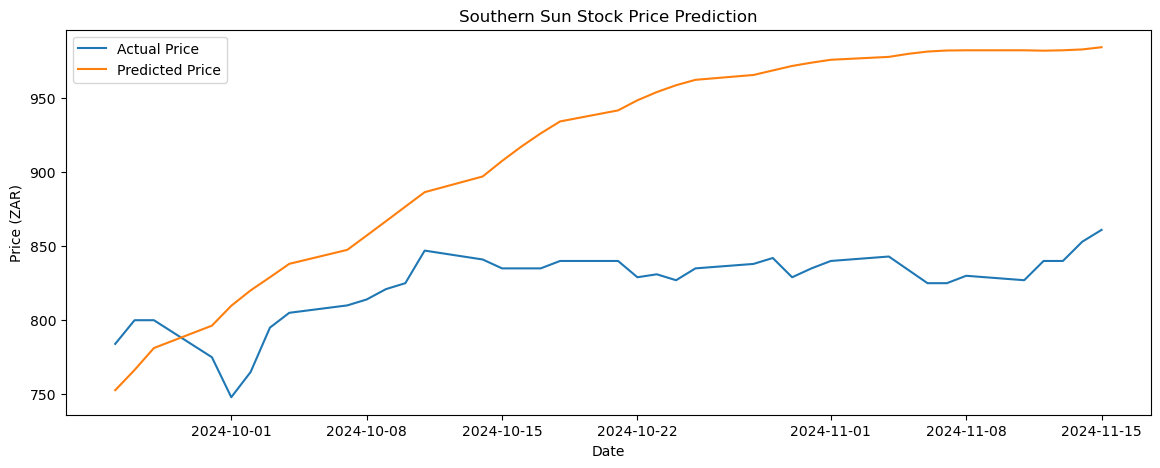

In [51]:
# VIsualizing predictions
plt.figure(figsize=(14, 5))
plt.plot(data.index[-len(y_test):], y_test, label="Actual Price")
plt.plot(data.index[-len(y_test):], prediction, label="Predicted Price")
plt.legend()
plt.title("Southern Sun Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price (ZAR)")
plt.show()


In [52]:
# Predicting the next 7 days
last_seq = scaled_prices[-seqL:]  # Use the last 60 days for prediction
prediction = []

for _ in range(7):
    # Predict the next day
    next_day = model.predict(last_seq.reshape(1, seqL, 1))
    prediction.append(next_day[0, 0])
    
    # Update the sequence with the predicted value
    last_seq = np.append(last_seq[1:], next_day, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [53]:
# Transforming predictions back to original scale
predicted_prices = scaler.inverse_transform(np.array(prediction).reshape(-1, 1))

# Display the predicted prices for the next 7 days
print("Predicted Prices for the Next 7 Days:")
for i, price in enumerate(predicted_prices, 1):
    print(f"Day {i}: {price[0]:.2f} ZAR")

Predicted Prices for the Next 7 Days:
Day 1: 986.79 ZAR
Day 2: 996.51 ZAR
Day 3: 1011.00 ZAR
Day 4: 1029.02 ZAR
Day 5: 1049.67 ZAR
Day 6: 1072.35 ZAR
Day 7: 1096.56 ZAR


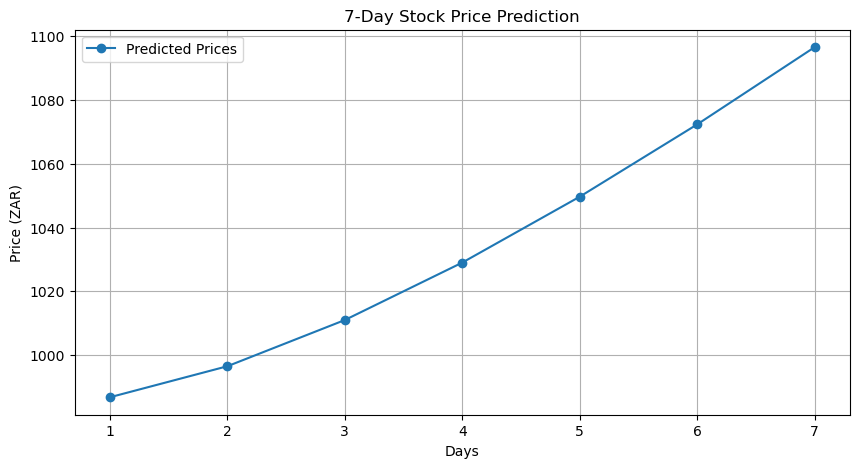

In [54]:
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(range(1, 8), predicted_prices, marker='o', label="Predicted Prices")
plt.title("7-Day Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price (ZAR)")
plt.legend()
plt.grid()
plt.show()